In [1]:
from tripp import Trajectory
import matplotlib.pyplot as plt
import pandas as pd

/Users/kafuman/Ivan/TrIPP/TrIPP/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pdb = './files/1AKI_clean_min_cg_pbc_p.pdb' #topology, can be any format readable by MDAnalysis
traj = './files/1AKI_clean_eq_md2_T300_300ns_p_fit_skip100.xtc' #trajectory, can be any format readable by MDAnalysis

# Extracting both the pKa and buridness data

In [3]:
tripp = Trajectory(trajectory_file=traj,
                              topology_file = pdb,
                              cpu_core_number=10)
tripp.run(output_file='1AKI_clean_md2',
          extract_surface_data=True, #If this is set to False, only pKa data will be extracted, else both pKa and buridness data will be extracted
          chain='A',
          mutation=None)

Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default


/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/b

After running TriPP on the trajectory, the time evolution of the pKa and buridness of individual residues are saved as *_pka.csv, and *_surf.csv. The pKa of individual residues can be plotted with a boxplot.

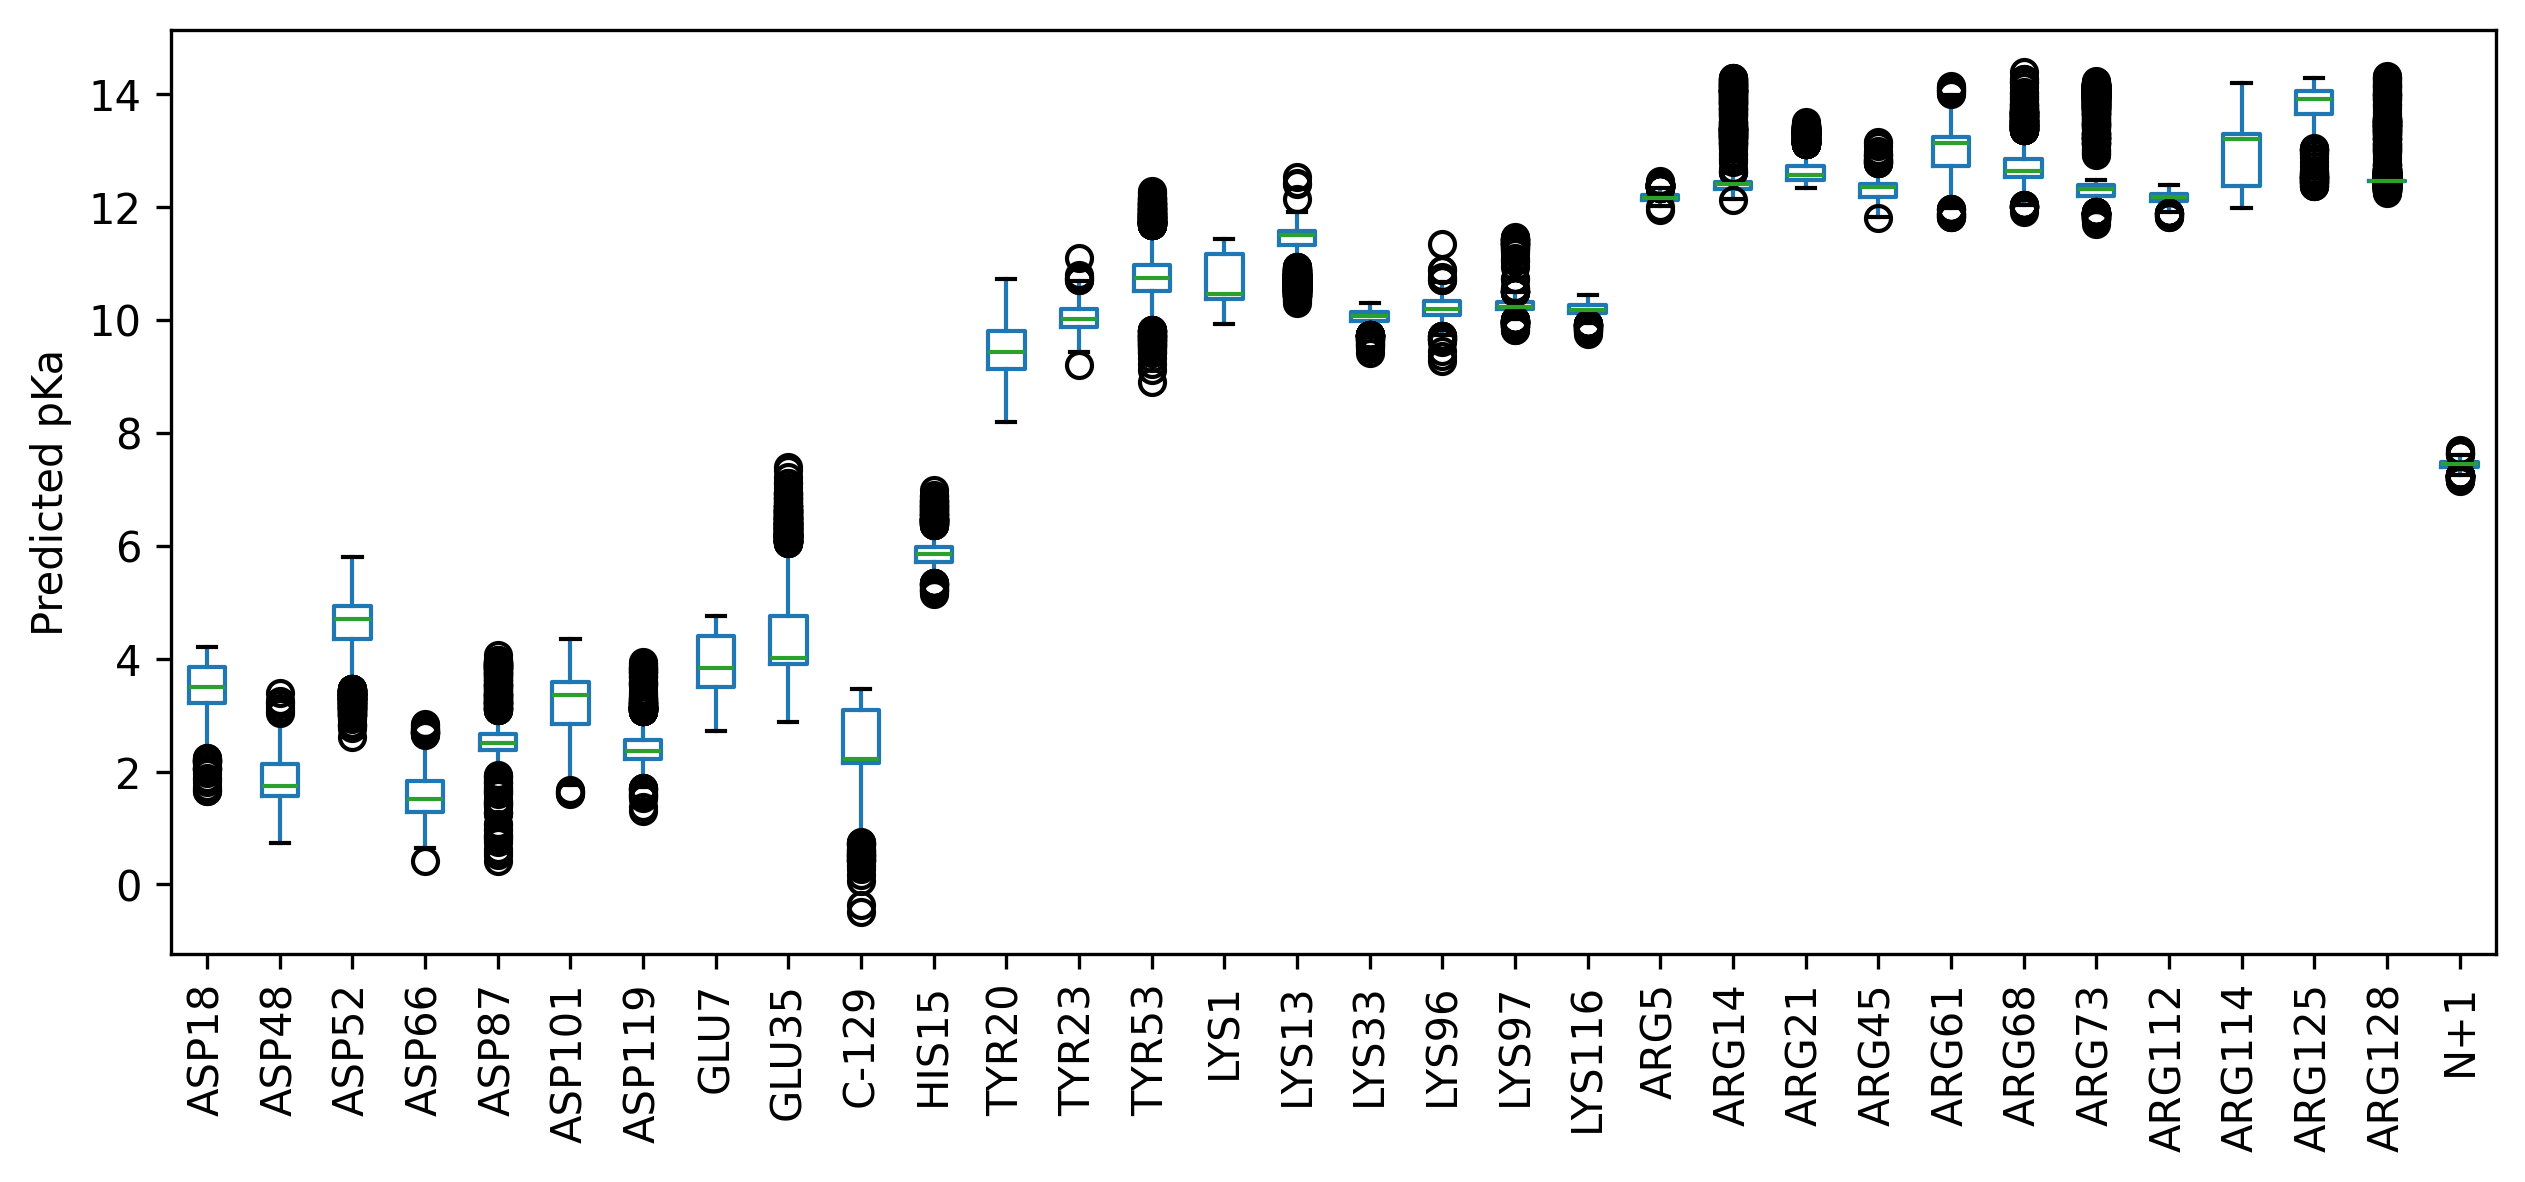

In [4]:
df = pd.read_csv('./1AKI_clean_md2_pka.csv')
CYS = []
for residue in df.columns[1:]:
    if 'CYS' in residue:
        CYS.append(residue) #Cysteine was excluded because they are disulfide bonded.
fig,ax=plt.subplots(figsize=(10,4),dpi=300)
df_noCYS = df.loc[:, ~df.columns.isin(['Time [ps]','CYS6', 'CYS30', 'CYS64', 'CYS76', 'CYS80', 'CYS94', 'CYS115', 'CYS127'])]
df_noCYS.boxplot(ax=ax,grid=False,rot=90)
ax.set_ylabel('Predicted pKa')
plt.show()

One can inspect the time evolution of the pKa and buridness of a specific residue, ie: ASP52

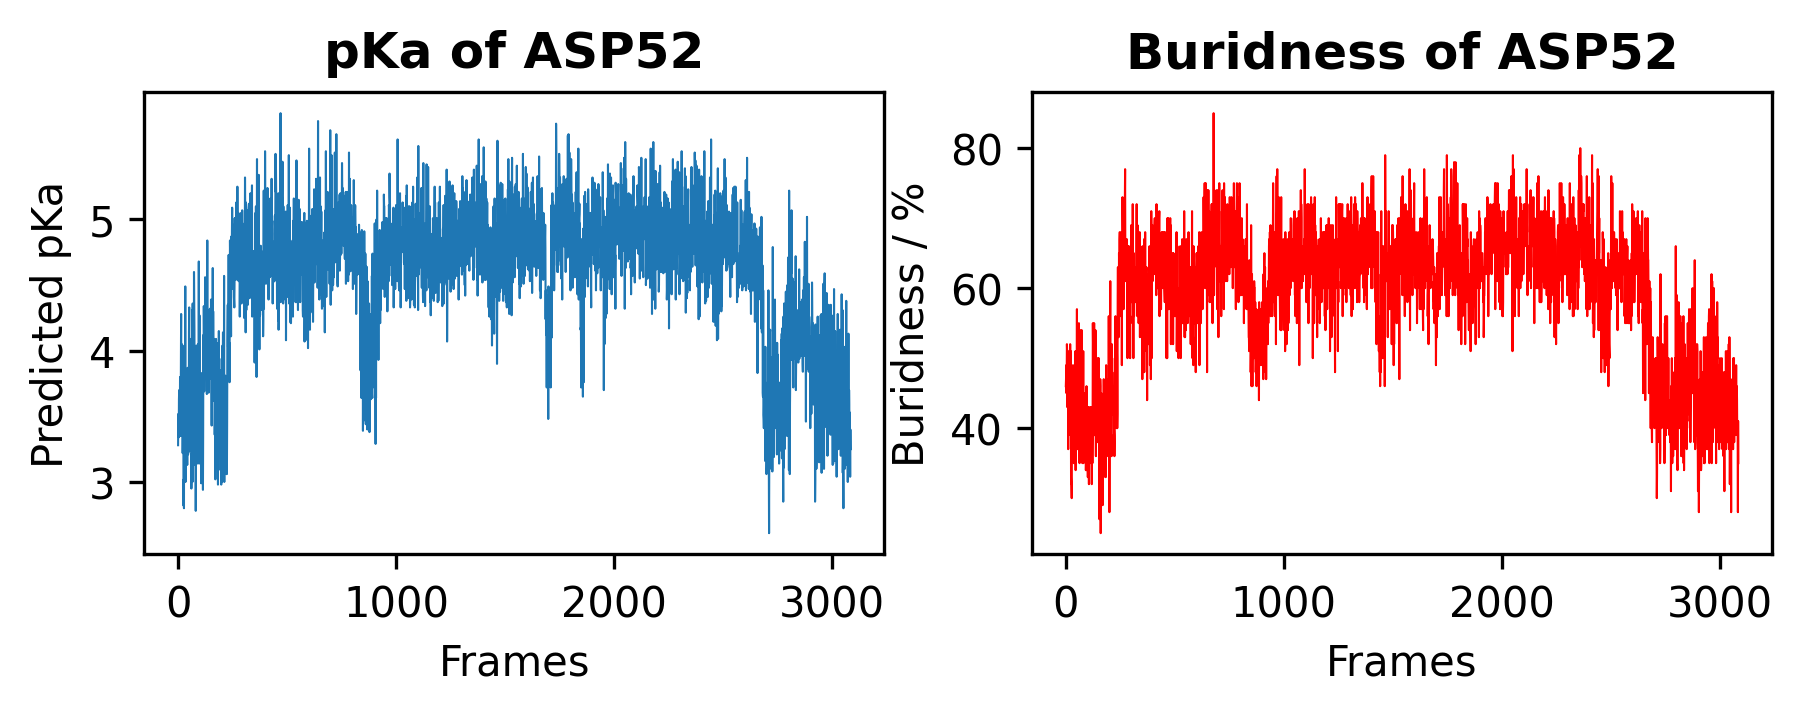

In [5]:
fig,ax = plt.subplots(1,2,figsize=(7,2),dpi=300)
df_pka = pd.read_csv('./1AKI_clean_md2_pka.csv')
df_pka['ASP52'].plot(ax=ax[0], lw=0.5)
ax[0].set_ylabel('Predicted pKa')
ax[0].set_xlabel('Frames')
ax[0].set_title('pKa of ASP52',fontweight="bold")
df_surf = pd.read_csv('./1AKI_clean_md2_surf.csv')
df_surf['ASP52'].plot(ax=ax[1],lw=0.5,color='red')
ax[1].set_ylabel('Buridness / %')
ax[1].set_xlabel('Frames')
ax[1].set_title('Buridness of ASP52',fontweight="bold")
plt.show()

# Pseudomutation on ASN44 and ARG114
Notice that both ASP52 and GLU35 had a higher pKa range than its normal pKa at pH 7.4. Visual inspection of the trajectory shows that ASN44 and ARG114 seem to be the main contriubution leading to the increase of their pKa, respectively. To confirm their contributions, a pseudomutation of the exisiting trajectory can be performed individually.

In [6]:
tripp = Trajectory(trajectory_file=traj,
                              topology_file = pdb,
                              cpu_core_number=10)
#Pseudomutate ASN44 to confirm its contribution on ASP52
tripp.run(output_file='1AKI_clean_md2',
          extract_surface_data=True, #If this is set to False, only pKa data will be extracted, else both pKa and buridness data will be extracted
          chain='A',
          mutation=44)
#Pseudomutate ARG114 to confirm its contribution on GLU35
tripp.run(output_file='1AKI_clean_md2',
          extract_surface_data=True, #If this is set to False, only pKa data will be extracted, else both pKa and buridness data will be extracted
          chain='A',
          mutation=114)

Your topology file contains no chain identity. Will add chain A for your whole system by default


/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default


/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/b

Your topology file contains no chain identity. Will add chain A for your whole system by default


/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default
Your topology file contains no chain identity. Will add chain A for your whole system by default


/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/b

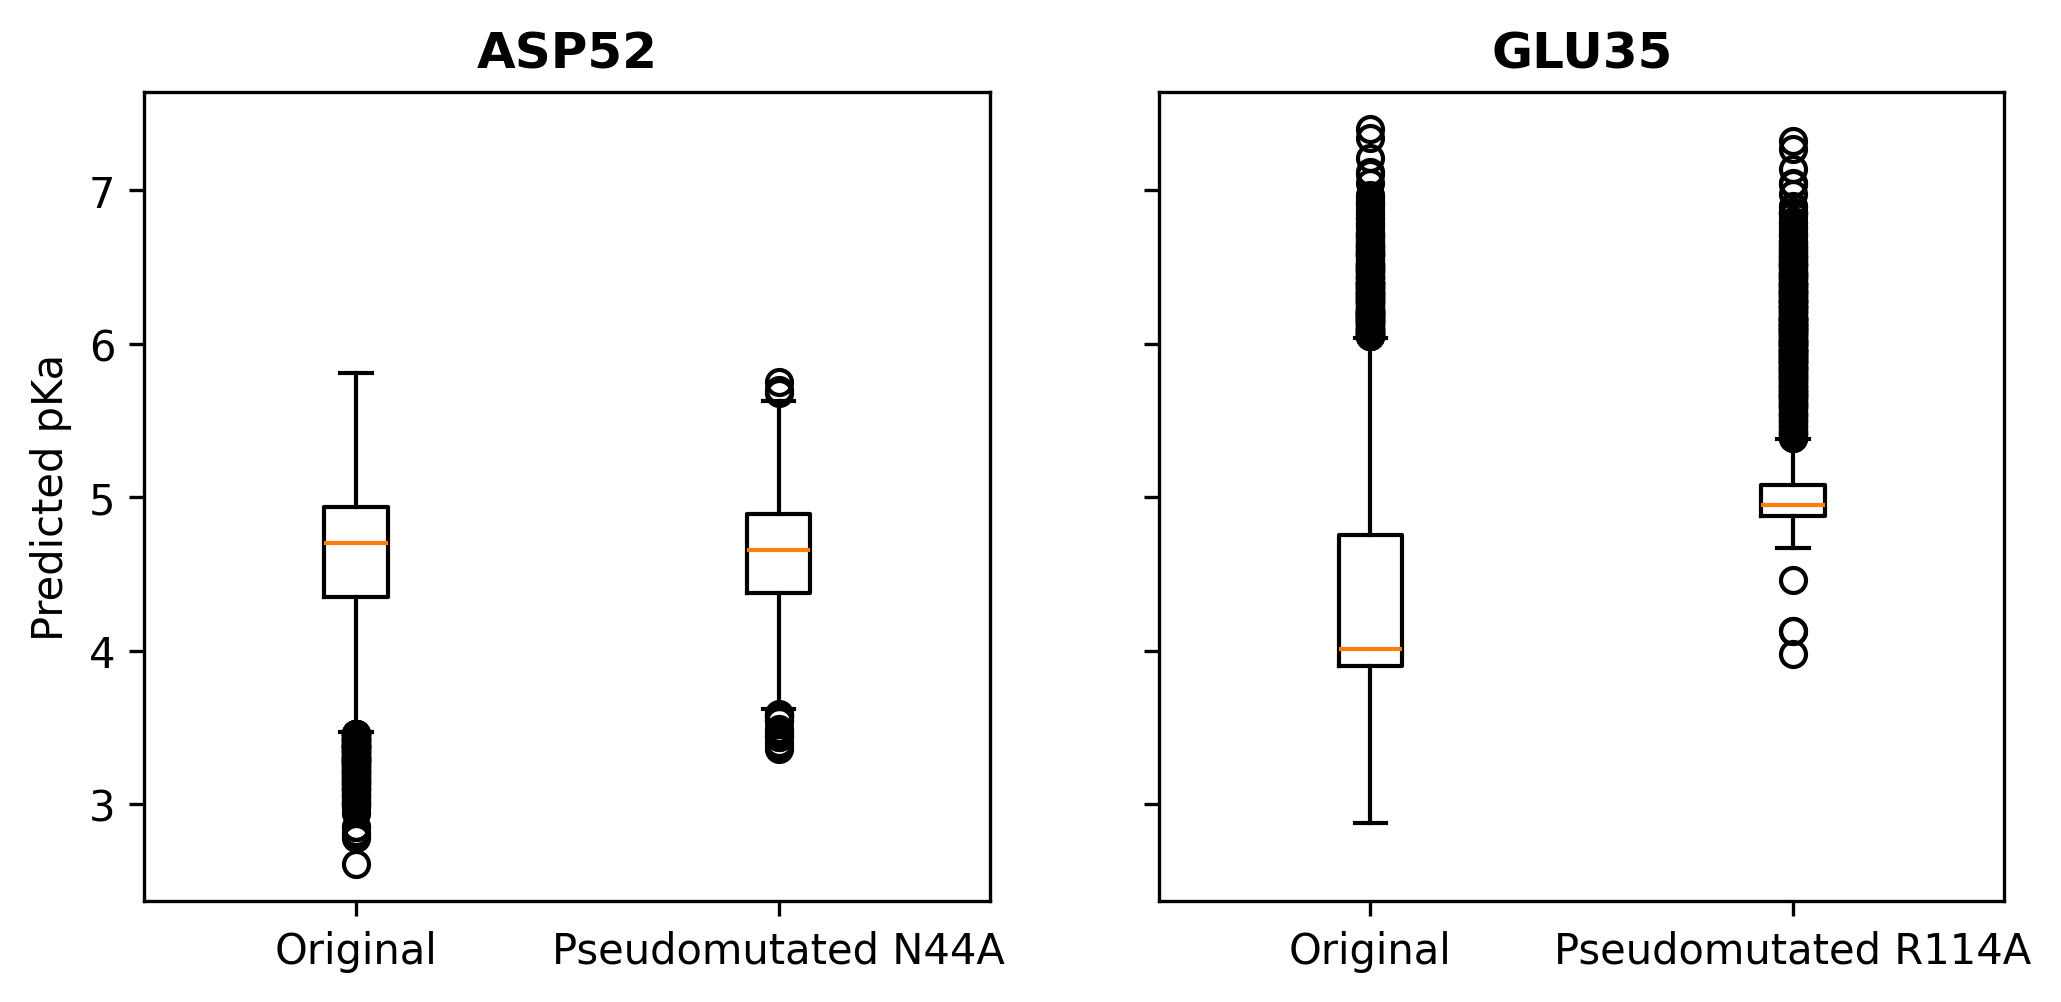

In [7]:
csvs = ['1AKI_clean_md2_pka.csv','1AKI_clean_md2_44_pka.csv','1AKI_clean_md2_114_pka.csv']
targets = ['ASP52','GLU35']
ref_pka = [3.90,4.31] #CRC Handbook of Chemistry and Physics 95th Edition at 25 degrees celcius
fig,ax = plt.subplots(1,2,figsize=(8,3.5),sharey=True,dpi=300)
df_before = pd.read_csv(csvs[0])
df_N44A = pd.read_csv(csvs[1])
df_R114A = pd.read_csv(csvs[2])

ax[0].boxplot([df_before[targets[0]],df_N44A[targets[0]]])
ax[1].boxplot([df_before[targets[1]],df_R114A[targets[1]]])
ax[0].set_xticklabels(['Original','Pseudomutated N44A'])
ax[1].set_xticklabels(['Original','Pseudomutated R114A'])
ax[0].set_title(targets[0],fontweight="bold")
ax[1].set_title(targets[1],fontweight="bold")
ax[0].set_ylabel('Predicted pKa')
plt.show()

ASP52 form hydrogen bond with ASN44 which lowers the pKa of ASP52. However, conformational changes of the protein disrupted this hydrogen bond (ASP52:Side-ASN44:Side). This leads to an increase of pKa during when hydrogen bond is deformed. Pseudomutation of ASN44 to ALA44 reveals that it directly affect ASP52 pKa as the hydrogen bond can no longer form between ASP52 and ALA44.

Similarly, ARG114 directly affects the pKa of GLU35 which is confirmed by the pseudomutation of ARG114 to ALA114. The lost of hydrogen bond increases the pKa.

# Visualization

In [3]:
from tripp import Visualization

Another function provided in TrIPP package is the visualization tool. It provides a quick way to analyse the mean pKa of residues.
The visualization class takes in two input parameters. One is the structure of the protein and the other one is the csv file of the pKa generated from running the Trajectroy class.

In [4]:
original_visualization = Visualization(pdb,'./1AKI_clean_md2_pka.csv')

Two coloring method is provided in the function "color_pka()".
1. "mean" calculates the mean value of the residue pKa over the trajectory, and is assigned to the bfactor/tempfactor of the residue in the structure file.
2. "difference_to_model_value" calculates the mean value of the residue pKa over the trajectory. The mean value is then subtracted from the model pka value in solution as given by PROPKA.

In [5]:
pymol_path = '/Applications/PyMOL.app/Contents/MacOS/MacPyMOL' #Make sure you specify where your pymol installation is 
original_visualization.color_pka(pymol_path,'1AKI_clean_md2_pka','mean',0,14,'red_white_blue')

/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1200: UserWarning: Found missing chainIDs. Corresponding atoms will use value of 'X'
  warnings.warn("Found missing chainIDs."


 PyMOL(TM) 3.0.1 - Incentive Product
 Copyright (C) Schrodinger, LLC
 
 This Executable Build integrates and extends Open-Source PyMOL.
 Detected OpenGL version 2.1. Shaders available.
 Tessellation shaders not available
 Detected GLSL version 1.20.
 OpenGL graphics engine:
  GL_VENDOR:   Apple
  GL_RENDERER: Apple M2 Pro
  GL_VERSION:  2.1 Metal - 83
 License Expiry date: 01-jul-2024
 Detected 12 CPU cores.  Enabled multithreaded rendering.


In [7]:
original_visualization.color_pka(pymol_path,'1AKI_clean_md2_pka','difference_to_model_value',-5,5,'red_white_blue')

/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/kafuman/bin/miniconda3/envs/TrIPP/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1200: UserWarning: Found missing chainIDs. Corresponding atoms will use value of 'X'
  warnings.warn("Found missing chainIDs."


 PyMOL(TM) 3.0.1 - Incentive Product
 Copyright (C) Schrodinger, LLC
 
 This Executable Build integrates and extends Open-Source PyMOL.
 Detected OpenGL version 2.1. Shaders available.
 Tessellation shaders not available
 Detected GLSL version 1.20.
 OpenGL graphics engine:
  GL_VENDOR:   Apple
  GL_RENDERER: Apple M2 Pro
  GL_VERSION:  2.1 Metal - 83
 License Expiry date: 01-jul-2024
 Detected 12 CPU cores.  Enabled multithreaded rendering.


User can visualize the corresponding PyMOL session (.pse) for quick analysis.